In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from tvb.simulator.lab import *

In [ ]:
sc_labels = np.loadtxt("DK_HCP_SC_labels.txt", "str")
weights = np.loadtxt("DK_SC_HCPavg785_WithCereb_weights.txt")
tract_lengths = np.loadtxt("DK_SC_HCPavg785_WithCereb_tract_lengths.txt")

# "Normalise" the weights 
# weights = np.log(1 + weights)
weights /= np.max(weights)

# Adapt the labels to emp FC format

with open("../resources/network_labels.pkl", "rb") as f:
    emp_labels = pickle.load(f)
emp_labels = np.insert(emp_labels, 2, "lh_caudalmiddlefrontal")
emp_labels = np.insert(emp_labels, 36, "rh_caudalmiddlefrontal")

new_labels = sc_labels.tolist()
for i, lab in enumerate(new_labels):
    if "ctx" in lab:
        _, hemi, name = lab.split('-')
        new_labels[i] = f"{hemi}_{name}"
    else:
        new_labels[i] = lab.upper()
        if new_labels[i].endswith("THALAMUS"):
            new_labels[i] = new_labels[i] + "-PROPER"
new_labels = np.array(new_labels)

to_delete_fc = []
for i, lab in enumerate(emp_labels):
    if not lab in new_labels:
        to_delete_fc.append(i)
emp_labels = np.delete(emp_labels, to_delete_fc)

transform = {}
for i, lab in enumerate(emp_labels):
    if lab in new_labels:
        transform[i] = np.where(new_labels == lab)

sc_labels = ["" for i in new_labels]
for i in range(len(new_labels)):
    sc_labels[i] = new_labels[transform[i]]

sc_labels = np.array(sc_labels).squeeze()

# Reorder weights and tract lengths
new_weights = np.zeros_like(weights)
new_tls = np.zeros_like(tract_lengths)
for i in range(len(sc_labels)):
    for j in range(len(sc_labels)):
        new_weights[i, j] = weights[transform[i], transform[j]]
        new_tls[i, j] = tract_lengths[transform[i], transform[j]]

# Configure and save
sc = connectivity.Connectivity(
    region_labels=sc_labels,
    weights=new_weights,
    tract_lengths=new_tls,
    centres=np.array([[0,0,0] for i in sc_labels])
)
sc.configure()

with open("DK_SC.pkl", "wb") as f:
    pickle.dump(sc, f)


/var/folders/mn/q624n0lj15s26j52tyhh602h0000gn/T/ipykernel_12022/742296072.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_weights[i, j] = weights[transform[i], transform[j]]
/var/folders/mn/q624n0lj15s26j52tyhh602h0000gn/T/ipykernel_12022/742296072.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_tls[i, j] = tract_lengths[transform[i], transform[j]]


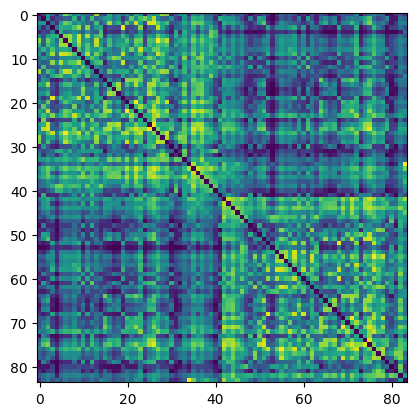

In [39]:
plt.imshow(weights, vmin=0, vmax=1)

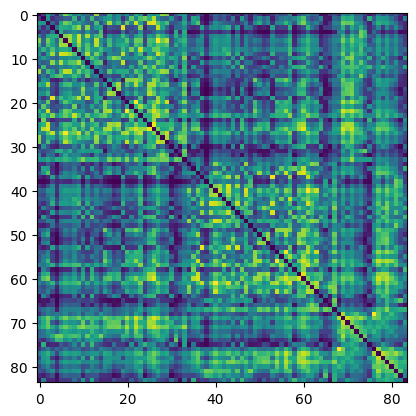

In [40]:
plt.imshow(sc.weights)